# Uno

In [1]:
from tfgpkg.preproc.line import LineSegmentation, SearchAlg
from tfgpkg.preproc.binarize import IlluminationBinarizer
import pkg_resources
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

plt.rcParams['figure.figsize'] = 10, 10

In [13]:
root_folder = pkg_resources.resource_filename("tfgpkg.test", "")
img_dir = f"{root_folder}{os.sep}resources{os.sep}preproc{os.sep}paragraphs{os.sep}"
img_files = [f"{img_dir}{os.sep}{x}" for x in os.listdir(img_dir) if "png" in x or "jpg" in x]

print(os.listdir(img_dir)[1:])

['easy1.png', 'easy2.png', 'easy3.png', 'easy4.png', 'extreme_hard.jpg', 'hard1.jpg', 'hard2.jpg', 'hard3.jpg', 'hard4.jpg', 'hard5.jpg', 'medium1.png', 'medium2.png', 'medium3.png', 'medium4.png', 'medium5.png', 'medium6.png', 'medium7.png']


0.9847321680546859


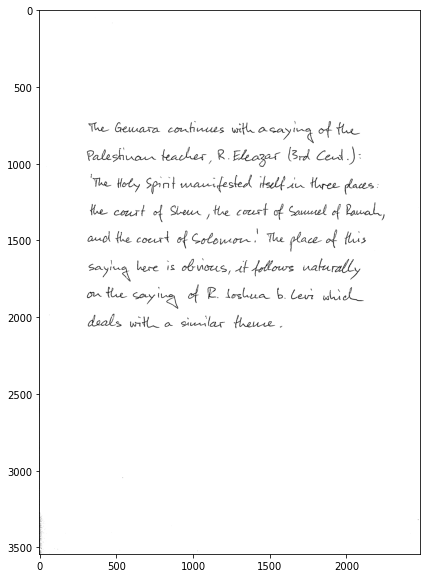

In [14]:
img = cv2.imread(img_files[-1], 0)
img = np.expand_dims(img, -1)
img = np.concatenate([img, img, img], axis=-1)

img = IlluminationBinarizer.illumination_compensation(img, as_bin=True, upper_value=1)

print(np.average(img.flatten()))

plt.imshow(img, cmap="gray")
plt.show()

In [15]:
%%time

lines = LineSegmentation(img).find_lines(SearchAlg.ASTAR)

INFO:root: img: (3542, 2479), hist: (3542,)
INFO:root: Found 39 original peaks.
INFO:lineSegm: 32 peaks detected.
INFO:lineSegm: 31 lines detected.
INFO:lineSegm: Right lines: [(0, 2), (2, 12), (12, 15), (15, 33), (33, 36), (36, 59), (59, 64), (64, 65), (65, 74), (74, 77), (102, 111), (111, 111), (111, 128), (128, 136), (136, 148), (148, 149), (149, 152), (152, 153), (153, 154), (154, 166), (166, 173), (173, 200), (200, 212), (212, 220), (220, 228), (228, 231), (231, 235), (235, 238), (238, 238)]
Wrong lines: [(77, 84), (84, 102), (238, 3541)]

  0%|                                                                                                                                              | 0/3 [00:02<?, ?it/s]


TypeError: unsupported operand type(s) for /: 'generator' and 'int'

In [17]:
len(lines)

6

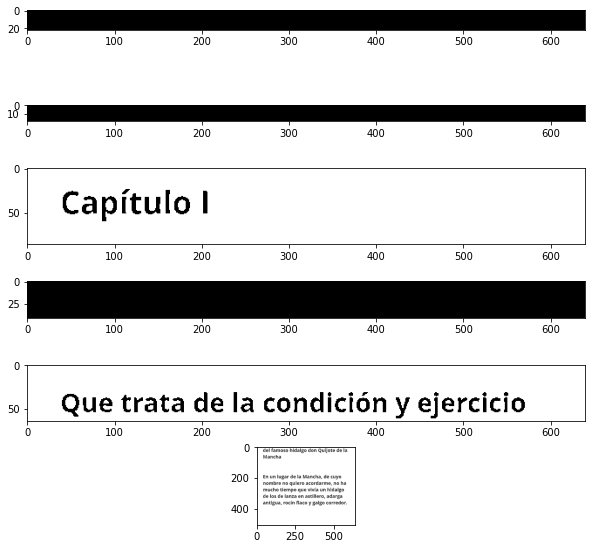

In [16]:
_, axes = plt.subplots(len(lines), 1)
axes = axes.flatten()

for idx, line in enumerate(lines):
    axes[idx].imshow(line, cmap="gray")

In [7]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder

matrix = [
  [1, 1, 1],
  [1, 0, 1],
  [1, 1, 1]
]
grid = Grid(matrix=matrix)

start = grid.node(0, 0)
end = grid.node(2, 2)

finder = AStarFinder(diagonal_movement=DiagonalMovement.always)
path, runs = finder.find_path(start, end, grid)

print('operations:', runs, 'path length:', len(path))
print(grid.grid_str(path=path, start=start, end=end))

operations: 5 path length: 4
+---+
|sx |
| #x|
|  e|
+---+
